- 주어진 가상의 고객행동/구매 data를 가지고 사전 행동을 분석하고 EDA 결과 및 행동 특성에 따라 유형화(고객 sgmentation) 및 RFM Class Score 부여

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from os import getcwd

In [3]:
dataPath = Path(getcwd()).parent

filename1 = f'{dataPath}/data/DM1_DS_99_HCKRTHN_CNTT_F.csv'
filename2 = f'{dataPath}/data/DM1_DS_99_HCKRTHN_DEMO_F.csv'
filename3 = f'{dataPath}/data/DM1_DS_99_HCKRTHN_PROS_ITG_F.csv'

In [4]:
#차량 정보
carinfo_df = pd.read_csv(filename1,encoding='cp949')
#고객 접촉 이력 정보
cus = pd.read_csv(filename2,encoding='cp949')
#채널 인입 이력
inc = pd.read_csv(filename3,encoding='cp949')

##데이터 전처리

---
1. 해당되는 고객의 차량 계약 이력 및 정보
2. 1:n 관계로 다수의 차량 구매 이력


In [5]:
#차량 정보
carinfo_df = pd.read_csv(filename1,encoding='cp949')
carinfo_df.head(5)

,CAR_ID,CNTT_DT,VEHL_CD,DOM_MDL_NM,PAC_SCN_NM,SALE_CGRD_NM,SALE_TRIM_NM,SALE_ENG_NM,CUS_ID
0,C98N3HQIS4G67,20210302,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK
1,C18MB8E9FEO8O,20220117,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X
2,CXMMZDI2JRWCX,20200511,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3
3,C934SRCKF4H44,20220104,NX,The all-new 투싼 하이브리드 인스퍼레이션 2WD A,RV,준중형SUV,인스퍼레이션,하이브리드,ATHNS3F4766FKDW3
4,CU1BBNUEHOTDM,20220210,JJ,The All new G80 가솔린 2.5T AWD 19인치,승용,대형,19인치A SDS2,가솔린 2.5T,A8D7NHFKA3K83QH4


In [6]:
carinfo_df.rename(columns = {
    "CAR_ID":"차량ID",
    "CNTT_DT":"계약일자",
    "VEHL_CD":"차종코드",
    "DOM_MDL_NM":"모델명",
    "PAC_SCN_NM":"승상구분명",
    "SALE_CGRD_NM":"판매차급명",
    "SALE_TRIM_NM":"판매트림명",
    "SALE_ENG_NM":"판매엔진명",
    "CUS_ID":"고객ID",
}, inplace = True)
carinfo_df

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID
0,C98N3HQIS4G67,20210302,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK
1,C18MB8E9FEO8O,20220117,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X
2,CXMMZDI2JRWCX,20200511,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3
3,C934SRCKF4H44,20220104,NX,The all-new 투싼 하이브리드 인스퍼레이션 2WD A,RV,준중형SUV,인스퍼레이션,하이브리드,ATHNS3F4766FKDW3
4,CU1BBNUEHOTDM,20220210,JJ,The All new G80 가솔린 2.5T AWD 19인치,승용,대형,19인치A SDS2,가솔린 2.5T,A8D7NHFKA3K83QH4
...,...,...,...,...,...,...,...,...,...
72780,CF5XYYWGM4962,20111025,MD,아반떼MD 자가용 가솔린 1.6 A 오토 11MY,승용,준중형,A,가솔린 1.6,ACWSOYPRRWLHL2I1
72781,C91VRA1RAE6EL,20160504,TL,투싼TL 디젤 1.7 Premium 2WD DCT,RV,준중형SUV,Premium,디젤 1.7,ACWSOYPRRWLHL2I1
72782,COAFAA0KQ2F1N,20220203,NX,The all-new 투싼 하이브리드 프리미엄 2WD A/T,RV,준중형SUV,프리미엄,하이브리드,AF3D2H4N6PO5PY24
72783,COBZ4YAULMIMD,20100729,JA,G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY,소형상용,소형버스,CVX,디젤,APXWMUKE36MD8PX1


In [7]:
##cus df 열 변경
cus.rename(columns = {
    "CUS_ID":"고객ID",
    "PSN_BIZR_YN":"개인사업자여부",
    "TYMD":"생년",
    "SEX_SCN_NM":"성별구분명",
}, inplace = True)
cus

,고객ID,개인사업자여부,생년,성별구분명
0,AMR9MOP756HN28V9,N,1990.0,여자
1,AL2E2HLDMN50FN9E,N,1955.0,남자
2,APW9ZIWDQQNYY8LK,N,1992.0,남자
3,AGBCIS57DPHRRP9X,N,1977.0,남자
4,A4W2GG6ZLMZ81DB3,N,1974.0,여자
...,...,...,...,...
89575,AF3D2H4N6PO5PY24,N,1968.0,남자
89576,AQSF1UNGCVX5CVJH,N,1984.0,남자
89577,ARJA0WA3EEXVZQFW,N,1982.0,남자
89578,APXWMUKE36MD8PX1,N,1984.0,남자


In [8]:
##inc df 열 변경
inc.rename(columns = {
    "CUS_ID":"고객ID",
    "CASE_ID":"접촉ID",
    "INP_DTM":"인입일시",
    "CHAN_SCN_NM":"채널구분명",
    "CHAN_DTL_SCN_NM":"채널상세구분명",
    "IRD_VEHL_CD":"관심차량",
}, inplace = True)
inc

,고객ID,접촉ID,인입일시,채널구분명,채널상세구분명,관심차량
0,AKZWMZWJ3HTYTOSS,BK69SK0W9NOEXIQU,2022-01-09 16:00:00,시승시스템,시승,JW
1,AAMN599HM0XFRIRK,BCPT4WL1QHD8LK1M,2022-01-12 10:00:00,시승시스템,시승,QX
2,AP8ERGN3MGXWD0W1,BUYAFEX9M7PATNIF,2022-01-09 18:41:28,현대닷컴,견적,NX
3,ASIYQ5LM878U45P5,BVCR9MK9FIRXEUCL,2022-01-11 18:41:21,이벤트시스템,구매상담신청,NaN
4,A8KWVKZPITWG0PCO,BNQ8X4SUSC120MRF,2022-01-10 09:03:09,판매기회_상담완료,지속관리,JJ
...,...,...,...,...,...,...
159166,AS7OEWKWHIAK2WZ1,BS94L650O9PWIXE1,2022-03-07 18:09:35,판매기회_상담완료,지속관리,NX
159167,AVFD9EAOXP2BYXQY,BIL593DS4LTUT2JP,2022-02-03 10:23:16,판매기회_상담완료,지속관리,NaN
159168,AA9FVJGB2L5OG3IW,B26O6YSJL6XOIHIZ,2022-03-14 11:05:38,판매기회_상담완료,지속관리,LC
159169,AIJ2KUXDXEV0VDUS,BXQDUBABH92L3XOQ,2022-05-09 10:04:17,판매기회_상담완료,지속관리,NaN


In [13]:
import datetime
carinfo_df['계약일자'] = carinfo_df['계약일자'].astype('str')
carinfo_df['계약일자'] = carinfo_df['계약일자'].apply(lambda _ : datetime.datetime.strptime(_,'%Y%m%d'))

In [14]:
new_df = pd.merge(carinfo_df, cus, left_on='고객ID',right_on='고객ID')
new_df

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID,개인사업자여부,생년,성별구분명
0,C98N3HQIS4G67,2021-03-02,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK,N,1992.0,남자
1,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X,N,1977.0,남자
2,CXMMZDI2JRWCX,2020-05-11,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3,N,1974.0,여자
3,C934SRCKF4H44,2022-01-04,NX,The all-new 투싼 하이브리드 인스퍼레이션 2WD A,RV,준중형SUV,인스퍼레이션,하이브리드,ATHNS3F4766FKDW3,N,1981.0,여자
4,CU1BBNUEHOTDM,2022-02-10,JJ,The All new G80 가솔린 2.5T AWD 19인치,승용,대형,19인치A SDS2,가솔린 2.5T,A8D7NHFKA3K83QH4,N,1965.0,여자
...,...,...,...,...,...,...,...,...,...,...,...,...
71056,CF5XYYWGM4962,2011-10-25,MD,아반떼MD 자가용 가솔린 1.6 A 오토 11MY,승용,준중형,A,가솔린 1.6,ACWSOYPRRWLHL2I1,N,1979.0,남자
71057,C91VRA1RAE6EL,2016-05-04,TL,투싼TL 디젤 1.7 Premium 2WD DCT,RV,준중형SUV,Premium,디젤 1.7,ACWSOYPRRWLHL2I1,N,1979.0,남자
71058,COAFAA0KQ2F1N,2022-02-03,NX,The all-new 투싼 하이브리드 프리미엄 2WD A/T,RV,준중형SUV,프리미엄,하이브리드,AF3D2H4N6PO5PY24,N,1968.0,남자
71059,COBZ4YAULMIMD,2010-07-29,JA,G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY,소형상용,소형버스,CVX,디젤,APXWMUKE36MD8PX1,N,1984.0,남자


In [ ]:
df = pd.merge(new_df, inc , left_on='고객ID', right_on='고객ID')
df

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID,개인사업자여부,생년,성별구분명,접촉ID,인입일시,채널구분명,채널상세구분명,관심차량
0,C98N3HQIS4G67,2021-03-02,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK,N,1992.0,남자,BEAU7Z48W583G71Q,2022-01-07 16:00:00,시승시스템,시승,IG
1,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X,N,1977.0,남자,BAIHV6D4KPRS5UOI,2022-01-08 09:09:44,현대닷컴,견적,M5
2,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X,N,1977.0,남자,B9J6EPDGHFU232KO,2022-01-06 15:59:04,현대닷컴,견적,M5
3,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X,N,1977.0,남자,BEVM5AGBIJNEJPT4,2022-01-07 05:50:39,현대닷컴,견적,M5
4,CXMMZDI2JRWCX,2020-05-11,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3,N,1974.0,여자,BANMKVP8LPJ2G2VV,2022-01-08 14:30:00,시승시스템,시승,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126543,CF5XYYWGM4962,2011-10-25,MD,아반떼MD 자가용 가솔린 1.6 A 오토 11MY,승용,준중형,A,가솔린 1.6,ACWSOYPRRWLHL2I1,N,1979.0,남자,BBSQKEE5Y6BVZQG1,2022-01-03 10:57:18,판매기회_상담완료,지속관리,IG
126544,C91VRA1RAE6EL,2016-05-04,TL,투싼TL 디젤 1.7 Premium 2WD DCT,RV,준중형SUV,Premium,디젤 1.7,ACWSOYPRRWLHL2I1,N,1979.0,남자,BBSQKEE5Y6BVZQG1,2022-01-03 10:57:18,판매기회_상담완료,지속관리,IG
126545,COAFAA0KQ2F1N,2022-02-03,NX,The all-new 투싼 하이브리드 프리미엄 2WD A/T,RV,준중형SUV,프리미엄,하이브리드,AF3D2H4N6PO5PY24,N,1968.0,남자,BCUG98FEWVQSWS1P,2022-02-02 09:07:53,판매기회_상담완료,지속관리,NX
126546,COBZ4YAULMIMD,2010-07-29,JA,G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY,소형상용,소형버스,CVX,디젤,APXWMUKE36MD8PX1,N,1984.0,남자,BWW0W0ZD70IUOI9F,2022-01-03 11:40:27,판매기회_상담완료,지속관리,WR


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

current_date = pd.to_datetime('2022-06-01')
recency_df = df.groupby('고객ID')['계약일자'].max().reset_index()
recency_df['Recency'] = (current_date - pd.to_datetime(recency_df['계약일자'])).dt.days
recency_df = recency_df[['고객ID', 'Recency']]

frequency_df = df.groupby('고객ID')['차량ID'].nunique().reset_index()
frequency_df.columns = ['고객ID', 'Frequency']

cluster_df = recency_df.merge(frequency_df, on='고객ID', how='left')
cluster_df = cluster_df.merge(df[['고객ID', '승상구분명', '차종코드']].drop_duplicates('고객ID'), 
                             on='고객ID', how='left')

le = LabelEncoder()
cluster_df['승상구분명'] = le.fit_transform(cluster_df['승상구분명'])
cluster_df = cluster_df.dropna()

X = cluster_df[['Recency', 'Frequency', '승상구분명']]
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(X)

price_dict = {
    'H4': 3000, 'RF': 3500, 'H5': 3200, 'CM': 4000, 'M5': 2500, 
    'JA': 2800, 'EN': 4500, 'JM': 3800, 'BH': 5000, 'YF': 3400,
    'LX': 3500, 'NX': 3700, 'CN': 3100, 'TM': 3600, 'AX': 3900, 
    'JK': 3300, 'JP': 4000, 'NE': 3800, 'OS': 4200, 'JU': 3500,
    'US': 2700, 'FE': 3400, 'DN': 3200, 'IG': 4000, 'JJ': 4500,
    'QX': 4100, 'JW': 4300, 'JI': 3900
}

cluster_df['Estimated_Price'] = cluster_df['차종코드'].map(price_dict).fillna(3500)

# 클러스터별 평균 금액 계산
cluster_monetary = cluster_df.groupby('Cluster')['Estimated_Price'].mean().to_dict()

# 고객별 Monetary 계산 (클러스터 평균 금액 * Frequency)
cluster_df['Monetary'] = cluster_df['Cluster'].map(cluster_monetary) * cluster_df['Frequency']
df_with_monetary = df.merge(cluster_df[['고객ID', 'Monetary']], on='고객ID', how='left')

In [17]:
df = df_with_monetary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126548 entries, 0 to 126547
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   차량ID      126548 non-null  object        
 1   계약일자      126548 non-null  datetime64[ns]
 2   차종코드      126548 non-null  object        
 3   모델명       126548 non-null  object        
 4   승상구분명     126548 non-null  object        
 5   판매차급명     126548 non-null  object        
 6   판매트림명     126529 non-null  object        
 7   판매엔진명     126431 non-null  object        
 8   고객ID      126548 non-null  object        
 9   개인사업자여부   126548 non-null  object        
 10  생년        126548 non-null  float64       
 11  성별구분명     126548 non-null  object        
 12  채널구분명     126548 non-null  object        
 13  관심차량      106150 non-null  object        
 14  Monetary  126548 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 14.5+ MB


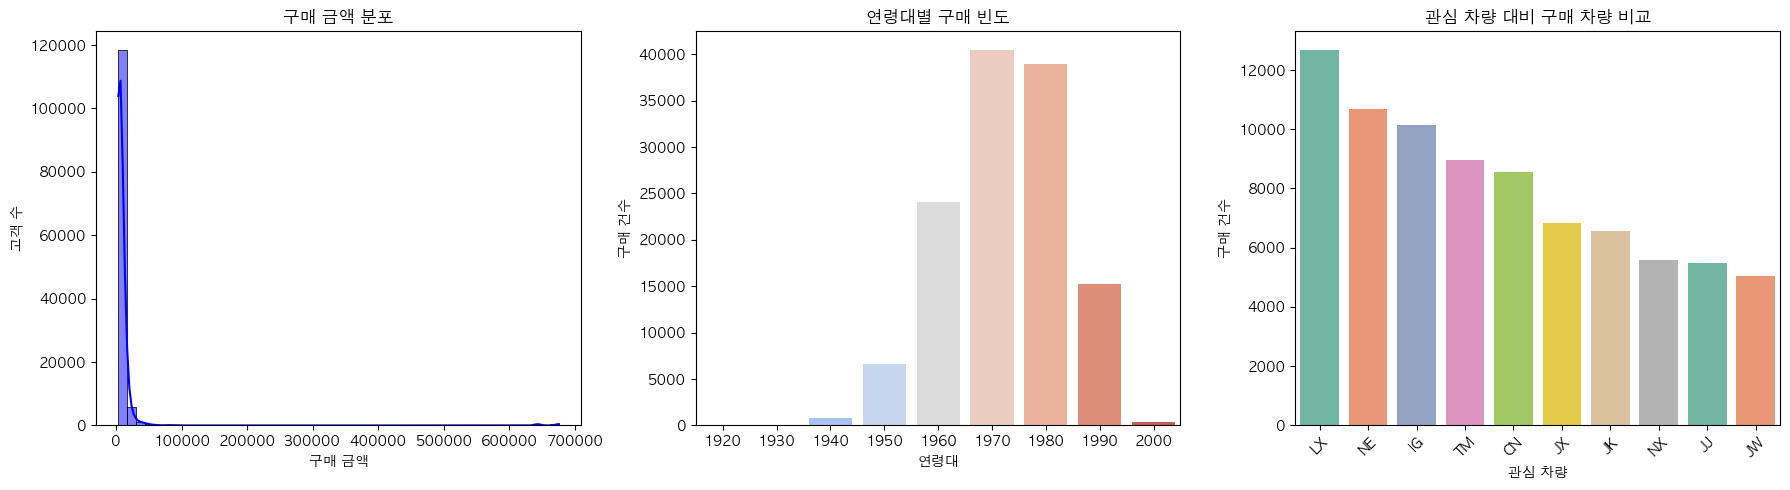

In [18]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ 구매 금액 분포
sns.histplot(df["Monetary"], bins=50, kde=True, ax=axes[0], color="blue")
axes[0].set_title("구매 금액 분포")
axes[0].set_xlabel("구매 금액")
axes[0].set_ylabel("고객 수")

# 2️⃣ 연령대별 구매 경향
df["연령대"] = (df["생년"] // 10 * 10).astype(int)
sns.countplot(data=df, x="연령대", order=sorted(df["연령대"].unique()), ax=axes[1], palette="coolwarm")
axes[1].set_title("연령대별 구매 빈도")
axes[1].set_xlabel("연령대")
axes[1].set_ylabel("구매 건수")

# 3️⃣ 관심 차량 vs 실제 구매 차종 비교
sns.countplot(data=df, x="관심차량", order=df["관심차량"].value_counts().index[:10], ax=axes[2], palette="Set2")
axes[2].set_title("관심 차량 대비 구매 차량 비교")
axes[2].set_xlabel("관심 차량")
axes[2].set_ylabel("구매 건수")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

current_date = pd.to_datetime('2022-01-01')
recency_df = df.groupby('고객ID')['계약일자'].max().reset_index()
recency_df['Recency'] = (current_date - pd.to_datetime(recency_df['계약일자'])).dt.days
recency_df = recency_df[['고객ID', 'Recency']]

frequency_df = df.groupby('고객ID')['차량ID'].nunique().reset_index()
frequency_df.columns = ['고객ID', 'Frequency']

cluster_df = recency_df.merge(frequency_df, on='고객ID', how='left')
cluster_df = cluster_df.merge(df[['고객ID', '승상구분명', '차종코드']].drop_duplicates('고객ID'), 
                             on='고객ID', how='left')

le = LabelEncoder()
cluster_df['승상구분명'] = le.fit_transform(cluster_df['승상구분명'])
cluster_df = cluster_df.dropna()

X = cluster_df[['Recency', 'Frequency', '승상구분명']]
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(X)

price_dict = {
    'H4': 3000, 'RF': 3500, 'H5': 3200, 'CM': 4000, 'M5': 2500, 
    'JA': 2800, 'EN': 4500, 'JM': 3800, 'BH': 5000, 'YF': 3400,
    'LX': 3500, 'NX': 3700, 'CN': 3100, 'TM': 3600, 'AX': 3900, 
    'JK': 3300, 'JP': 4000, 'NE': 3800, 'OS': 4200, 'JU': 3500,
    'US': 2700, 'FE': 3400, 'DN': 3200, 'IG': 4000, 'JJ': 4500,
    'QX': 4100, 'JW': 4300, 'JI': 3900
}

cluster_df['Estimated_Price'] = cluster_df['차종코드'].map(price_dict).fillna(3500)

# 클러스터별 평균 금액 계산
cluster_monetary = cluster_df.groupby('Cluster')['Estimated_Price'].mean().to_dict()

# 고객별 Monetary 계산 (클러스터 평균 금액 * Frequency)
cluster_df['Monetary'] = cluster_df['Cluster'].map(cluster_monetary) * cluster_df['Frequency']
df = df.merge(cluster_df[['고객ID', 'Monetary']], on='고객ID', how='left')

In [20]:
df

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID,개인사업자여부,생년,성별구분명,채널구분명,관심차량,Monetary_x,연령대,Monetary_y
0,C98N3HQIS4G67,2021-03-02,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK,N,1992.0,남자,시승시스템,IG,3594.887876,1990,3594.887876
1,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X,N,1977.0,남자,현대닷컴,M5,3594.887876,1970,3594.887876
2,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X,N,1977.0,남자,현대닷컴,M5,3594.887876,1970,3594.887876
3,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X,N,1977.0,남자,현대닷컴,M5,3594.887876,1970,3594.887876
4,CXMMZDI2JRWCX,2020-05-11,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3,N,1974.0,여자,시승시스템,CN,3544.327177,1970,3544.327177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126543,CF5XYYWGM4962,2011-10-25,MD,아반떼MD 자가용 가솔린 1.6 A 오토 11MY,승용,준중형,A,가솔린 1.6,ACWSOYPRRWLHL2I1,N,1979.0,남자,판매기회_상담완료,IG,6946.110976,1970,6946.110976
126544,C91VRA1RAE6EL,2016-05-04,TL,투싼TL 디젤 1.7 Premium 2WD DCT,RV,준중형SUV,Premium,디젤 1.7,ACWSOYPRRWLHL2I1,N,1979.0,남자,판매기회_상담완료,IG,6946.110976,1970,6946.110976
126545,COAFAA0KQ2F1N,2022-02-03,NX,The all-new 투싼 하이브리드 프리미엄 2WD A/T,RV,준중형SUV,프리미엄,하이브리드,AF3D2H4N6PO5PY24,N,1968.0,남자,판매기회_상담완료,NX,3594.887876,1960,3594.887876
126546,COBZ4YAULMIMD,2010-07-29,JA,G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY,소형상용,소형버스,CVX,디젤,APXWMUKE36MD8PX1,N,1984.0,남자,판매기회_상담완료,WR,3458.267964,1980,3458.267964


In [21]:
from sklearn import preprocessing

def get_score(level, data):
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    return score
    
def get_rfm_grade(df, num_class, rfm_tick_point, rfm_col_map, suffix=None):
    for k, v in rfm_tick_point.items():
        if isinstance(v,str):
            if v == 'quantile':
                scale = preprocessing.StandardScaler()
                temp_data = np.array(df[rfm_col_map[k]])
                temp_data = temp_data.reshape((-1,1))
                temp_data = scale.fit_transform(temp_data)
                temp_data = temp_data.squeeze()
 
                quantiles_level = np.linspace(0,1,num_class+1)[1:-1]
                quantiles = []
                for ql in quantiles_level:
                    quantiles.append(np.quantile(temp_data,ql))
            else:
                temp_data = np.array(df[rfm_col_map[k]])
 
                quantiles = np.linspace(np.min(temp_data),np.max(temp_data),num_class+1)[1:-1]
        else:
            temp_data = np.array(df[rfm_col_map[k]])
            quantiles = v
        score = get_score(quantiles, temp_data)
        new_col_name = rfm_col_map[k]+'_'+k
        if suffix:
            new_col_name = rfm_col_map[k]+'_'+suffix
        df[new_col_name] = score
    return df

In [22]:
from collections import Counter

df_with_monetary = df_with_monetary.sort_values(by='계약일자')
monetary_df = df_with_monetary.groupby('고객ID')['Monetary'].max().reset_index()

# Recency 계산
temp_recency_df = df_with_monetary[['고객ID', '계약일자']].drop_duplicates()
recency_df = temp_recency_df.groupby('고객ID')['계약일자'].max().reset_index()
recency_df = recency_df.rename(columns={'계약일자': 'Recency'})

# Frequency 계산
temp_frequency_df = df_with_monetary[['고객ID', '계약일자']].drop_duplicates()
frequency_df = temp_frequency_df.groupby('고객ID')['계약일자'].count().reset_index()
frequency_df = frequency_df.rename(columns={'계약일자': 'Frequency'})

rfm_df = pd.merge(recency_df, frequency_df, how='left', on='고객ID')
rfm_df = pd.merge(rfm_df, monetary_df, how='left', on='고객ID')

rfm_df.head()

,고객ID,Recency,Frequency,Monetary
0,A000O5LM55ZNYT7X,2022-06-02,1,3594.887876
1,A002W7L4ZEYIH624,2022-04-13,1,3594.887876
2,A0063H17IS0OELIO,2018-04-06,1,3473.055488
3,A007E35OUXTJ3BRR,2021-06-22,1,3594.887876
4,A007EWFPMLXHIDWC,2022-06-23,1,3594.887876


In [23]:
##분위수를 이용해 점수 부여
rfm_tick_point={'R':'quantile','F':'quantile','M':'quantile'}
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}

result = get_rfm_grade(df=rfm_df, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)

In [24]:
rfm_score = result[['고객ID', 'Monetary', 'Recency_R','Frequency_F','Monetary_M']]

def get_score(level, data, reverse = False):
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 
 
grid_number = 50
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5
class_level = np.linspace(1,5,num_class+1)[1:-1]
total_amount_of_sales = rfm_score['Monetary'].sum()

In [25]:
max_std = 0
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    score = w[0]*rfm_score['Recency_R'] + \
                        w[1]*rfm_score['Frequency_F'] + \
                        w[2]*rfm_score['Monetary_M'] 
    rfm_score['Class'] = get_score(class_level,score,True)
    grouped_rfm_score = rfm_score.groupby('Class')['Monetary'].sum().reset_index()

    grouped_rfm_score = grouped_rfm_score.sort_values('Class')
    temp_monetary = list(grouped_rfm_score['Monetary'])
    if temp_monetary != sorted(temp_monetary,reverse=True):
        continue
        
    grouped_rfm_score['Monetary'] = grouped_rfm_score['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['Monetary'].std()

    if max_std <= std_sales:
        max_std = std_sales
        optimal_weights = w

[Finding Optimal weights]: 100%|██████████| 1326/1326 [10:19<00:00,  2.14it/s]


In [30]:
optimal_weights

(0.82, 0.18, 0.0)

In [31]:
score = optimal_weights[0]*rfm_score['Recency_R'] + \
        optimal_weights[1]*rfm_score['Frequency_F'] + \
        optimal_weights[2]*rfm_score['Monetary_M']

rfm_score['Class'] = get_score(class_level,score,True)

In [35]:
rfm_score.to_csv('rfm.csv')

In [33]:
## 클래스별 고객 수 계산
temp_rfm_score1 = rfm_score.groupby('Class')['고객ID'].count().reset_index().rename(columns={'CustomerID':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = rfm_score.groupby('Class')['Monetary'].sum().reset_index()

## 클래스별 매출 기여도 계산
temp_rfm_score2['Contribution'] = temp_rfm_score2['Monetary'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
rfm_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))
rfm_df = rfm_df.rename(columns={'고객ID':'고객수', 'Contribution':'기여도'})
rfm_df.drop(columns="Monetary", inplace=True)

In [37]:
rfm_score

,고객ID,Monetary,Recency_R,Frequency_F,Monetary_M,Class
0,A000O5LM55ZNYT7X,3594.887876,5,1,2,1
1,A002W7L4ZEYIH624,3594.887876,4,1,2,2
2,A0063H17IS0OELIO,3473.055488,2,1,1,4
3,A007E35OUXTJ3BRR,3594.887876,2,1,2,4
4,A007EWFPMLXHIDWC,3594.887876,5,1,2,1
...,...,...,...,...,...,...
49726,AZZY0IZN75VOACLI,3544.327177,2,1,1,4
49727,AZZYI8XJU7OCXO73,3458.267964,1,1,1,5
49728,AZZYZ8SXW66M0RBL,7189.775752,3,4,4,3
49729,AZZZ70FWYOY16G62,10374.803891,1,5,5,5


In [ ]:
rfm_df = pd.merge(rfm_score, df, left_on='고객ID',right_on='고객ID')
rfm_df = rfm_df.drop(columns=['Monetary_y','Monetary_x'])

In [65]:
def categorize_age(age):
    age = 2025 - age
    if 30 <= age < 40:
        return "30대"
    elif 40 <= age < 50:
        return "40대"
    elif 20 <= age < 30:
        return "20대"
    elif 50 <= age < 60:
        return "50대"
    else:
        return "기타"

rfm_df["Age_Group"] = rfm_df["생년"].apply(categorize_age)

# 각 연령대별 Frequency 평균 계산
age_freq_avg = rfm_df.groupby("Age_Group")["Frequency_F"].mean()

In [66]:
rfm_df[['Age_Group']]

,Age_Group
0,30대
1,30대
2,40대
3,30대
4,기타
...,...
126543,기타
126544,기타
126545,기타
126546,기타


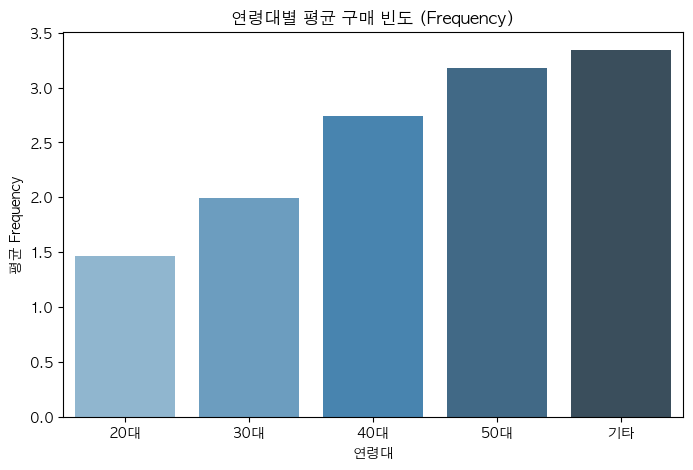

30~40대 평균 Frequency: 2.37


In [68]:
# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=age_freq_avg.index, y=age_freq_avg.values, palette="Blues_d")
plt.title("연령대별 평균 구매 빈도 (Frequency)")
plt.xlabel("연령대")
plt.ylabel("평균 Frequency")
plt.show()

# 30~40대 평균 구매 빈도 출력
avg_30s_40s = age_freq_avg.loc[["30대", "40대"]].mean()
print(f"30~40대 평균 Frequency: {avg_30s_40s:.2f}")
